<a href="https://colab.research.google.com/github/ThaisLasso/AI-uni/blob/main/Lista_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lista de Exercícios - P1**

Nos exercícios abaixo, considere os seguintes dados de treinamento para um problema de classificação binária:

In [ ]:
import numpy as np

X = np.array([[0.40, 1.34], [-1.77, -1.44], [0.39, 1.13], [-1.75, -1.18], [-1.20, -1.24],
     [1.07, 0.96], [1.01, -0.12], [1.31, 0.52], [-0.86, -1.52], [1.26, 1.63],
     [0.23, 0.36], [0.03, -0.35], [-1.55, -0.82], [0.33, 0.91], [1.43, 0.33]
     ])
Y = np.transpose(np.array([[1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0]]),(1,0))
print(np.concatenate((X,Y),axis=1))

[[ 0.4   1.34  1.  ]
 [-1.77 -1.44  1.  ]
 [ 0.39  1.13  1.  ]
 [-1.75 -1.18  1.  ]
 [-1.2  -1.24  1.  ]
 [ 1.07  0.96  1.  ]
 [ 1.01 -0.12  0.  ]
 [ 1.31  0.52  0.  ]
 [-0.86 -1.52  1.  ]
 [ 1.26  1.63  1.  ]
 [ 0.23  0.36  0.  ]
 [ 0.03 -0.35  0.  ]
 [-1.55 -0.82  1.  ]
 [ 0.33  0.91  1.  ]
 [ 1.43  0.33  0.  ]]


1. Plano Cartesiano:

(a) Represente os dados em um plano cartesiano com símbolos ou cores diferentes para cada categoria (0 e 1).

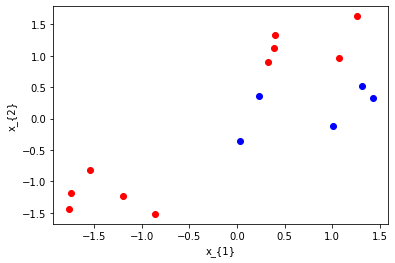

In [ ]:
import matplotlib.pyplot as plt


def plot_pontos():
  index = np.argwhere(Y[:,0]==1)
  plt.plot(X[index,0],X[index,1],'ro')
  index = np.argwhere(Y[:,0]==0)
  plt.plot(X[index,0],X[index,1],'bo')
  plt.xlabel('x_{1}')
  plt.ylabel('x_{2}')

plot_pontos()
plt.show()



(b) Defina uma regra que classifique corretamente os exemplos da tabela.

Se $x_{1}>0$ e $x_{2}\leq 0.52$, então $y = 0$, caso contrário $y = 1$. 

2. Árvore de Decisão:

(a) Calcule a entropia do conjunto de treinamento.

$H = -\sum_{i=1}^{k} p_{k}\log p_{k}$


In [ ]:
def entropia(Y):
  n_total = np.size(Y,axis=0)

  values = np.unique(Y)
  H = 0
  for y in values:
    index = np.argwhere(Y[:,0]==y)
    n_y = np.size(index,axis=0)
    p_y = n_y/n_total

    if p_y > 0:
      H += - p_y*np.log2(p_y)
  return H

H_total = entropia(Y)
print('Entropia: ',H_total)

Entropia:  0.9182958340544896


(b) Considere a pergunta $x_{1} \geq 0$ e calcule a entropia média após obter a resposta a essa pergunta.

In [ ]:
def Entropia_media(X,Y,variable,value):
  n_total = np.size(Y,axis=0)

  index = np.argwhere(X[:,variable] >= value)
  X_geq = X[index,:]
  Y_geq = Y[index,:]
  n_geq = np.size(Y_geq,axis=0)
  H_geq = entropia(Y_geq)
  # print('Entropia (maior igual): ',H_geq,n_geq)

  index = np.argwhere(X[:,variable] < value)
  X_l = X[index,:]
  Y_l = Y[index,:]
  n_l = np.size(Y_l,axis=0)
  H_l = entropia(Y_l)
  # print('Entropia (menor): ',H_l,n_l)

  H_medio = n_geq/n_total*H_geq + n_l/n_total*H_l
  return H_medio

H_media1 = Entropia_media(X,Y,0,0)
print('Entropia média:', H_media1)

Entropia média: 0.6666666666666666


(c) Considere a pergunta $x_{2} \geq 0$ e calcule a entropia média após obter a resposta a essa pergunta.

In [ ]:
H_media2 = Entropia_media(X,Y,1,0)
print('Entropia média:', H_media2)

Entropia média: 0.9118210668910758


(d) Calcule os ganhos de informação obtidos para as duas perguntas anteriores.

In [ ]:
Ganho_1 = H_total - H_media1
print('Ganho x_1 >= 0:', Ganho_1)
Ganho_2 = H_total - H_media2
print('Ganho x_2 >= 0:', Ganho_2)


Ganho x_1 >= 0: 0.2516291673878229
Ganho x_2 >= 0: 0.006474767163413775


(e) Escolha a pergunta com maior ganho de informação para ser a raı́z da árvore e complete a árvore para classificar corretamente todos os exemplos da tabela.

\ 

Se $x_1 < 0$, saída igual 1.

Caso contrário, se $x_2 > 0.8$, saída igual 1.

Caso contrário, saída igual 0.

3. Otimização:

(a) Considere a seguinte parábola $x_1 − 3(x_2 )^2 + 1 = 0$, e a esboce no plano cartesiano da questão 1. Note que essa parábola separa perfeitamente os exemplos dos dados de treinamento.

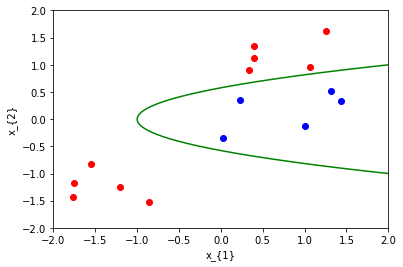

In [ ]:
import matplotlib.pyplot as plt

def plot_pontos_parabola():
  plot_pontos()

  x2 = np.arange(start=-2,stop=2,step=0.01)
  x1 = 3*x2**2 - 1
  plt.plot(x1,x2,'g')
  plt.axis([-2, 2, -2, 2])

  

plot_pontos_parabola()
plt.show()

(b) Fazendo uso dessa parábola, construa um classificador que classifique corretamente todos exemplos da tabela.

\

Se $x_1 − 3(x_2 )^2 + 1 > 0$, saı́da igual 0.

Caso contrário, saı́da igual 1.

(c) Utilizando a distância euclidiana, encontre o ponto da parábola mais próximo do ponto $(x_1 = 0, x_2 = 1)$. Utilize o algoritmo de Newton.

\

Considere abaixo que $\hat{x}_1$ e $\hat{x}_2$ indica o ponto de interesse, isto é, $\hat{x}_1 = 0$ e $\hat{x}_2 = 1$; enquanto $x_1$ e $x_2$ são pontos na parábola.

Logo, queremos minizar:
$$
  \min\sqrt{(\hat{x}_1-x_1)^2 + (\hat{x}_2-x_2)^2},
$$
mas
$$
  \arg\min\sqrt{(\hat{x}_1-x_1)^2 + (\hat{x}_2-x_2)^2} = \arg\min(\hat{x}_1-x_1)^2 + (\hat{x}_2-x_2)^2,
$$

Expressando tudo em termos de $x_2$, temos a função:
$$
f(x_2) = (\hat{x}_1-3(x_2 )^2 + 1)^2 + (\hat{x}_2-x_2)^2.
$$

Derivando temos:
$$
f'(x_2) = 2(\hat{x}_1-3(x_2 )^2 + 1)(-6x_{2}) + 2(\hat{x}_2-x_2)(-1) = 36(x_{2})^3 + (-12\hat{x}_1 - 12+2)x_2 + (-2\hat{x}_2)
$$
e
$$
f''(x_2) = 108(x_{2})^2 + (-12\hat{x}_1 - 12+2)
$$

(x_1,x_2) = ( 0.10762521851076512 , 0.6076252185107651 )


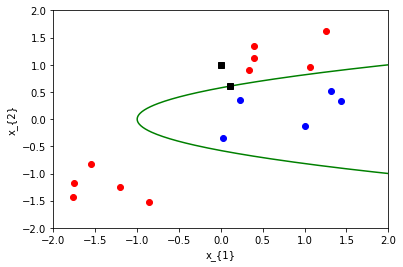

In [ ]:
hatx1 = 0
hatx2 = 1
x2 = 1

for i in range(100):
  f = 36*x2**3 + (-12*hatx1-12+2)*x2 + (-2*hatx2)
  ff = 108*x2**2 + (-12*hatx1 -12 +2)
  x2 = x2 - f/ff
  

x1 = 3*x2**2 - 1

print('(x_1,x_2) = (',x1,',',x2,')')

plot_pontos_parabola()
plt.plot(x1,x2,'ks')
plt.plot(hatx1,hatx2,'ks')
plt.show()


4. Redes Neurais:

(a) Considere uma Rede Neural com: dois atributos na entrada, uma camada escondida com 2 neurônios e uma camada de saı́da com 1 neurônio. Desenhe o esquema dessa rede neural (não esqueça da entrada de viés).



(b) Considere que $w_0$ representa o peso para o viés e que os pesos dos neurônios da camada escondida são dados por:

In [ ]:
w_input_hidden = np.array([[0.309, -3.438, 1.984],
                           [1.628, 3.428, 2.851] ])
w_hidden_output = np.array([[2.9992, 3.5103, -4.9397] ])

(c) Considere que a função de ativação de todos neurônios é a função logística. Para cada neurônio da camada escondida, especifique regiões de ativação (saída próxima de 1) e de não ativação (saída próxima de 0).

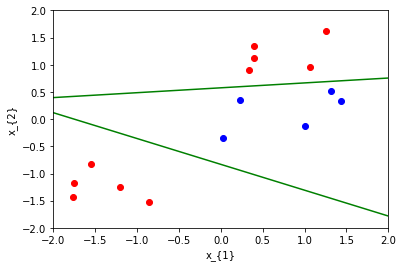

In [ ]:
plot_pontos()

plt.axis([-2, 2, -2, 2])

x1 = np.arange(start=-2,stop=2,step=0.01)

w = w_input_hidden[0,:]
x2 = -(w[0]*x1 + w[2])/w[1]
plt.plot(x1,x2,'g')

w = w_input_hidden[1,:]
x2 = -(w[0]*x1 + w[2])/w[1]
plt.plot(x1,x2,'g')

plt.show()



(d) Quais combinações de ativação dos neurônios da cama escondida ativam o neurônio da camada de saída?

\

Os dois neurônios devem ser ativados.

(e) Calcule a saída da rede neural quando $(x_1 = 0.5, x_2 = −1)$.

In [ ]:
input = np.transpose(np.array([[0.5, -1, 1]]))
in_hidden = w_input_hidden@input
a_hidden = 1/(1+np.exp(-in_hidden))
a_hidden = np.concatenate((a_hidden,[[1]]))
in_output = w_hidden_output@a_hidden
output = 1/(1+np.exp(-in_output))
print(output)


[[0.50258889]]


5. $k$-Vizinhos mais Próximos:

(a) Considere a classificação com base em votação e esboce as regiões referentes a cada categoria quando $k = 1$.

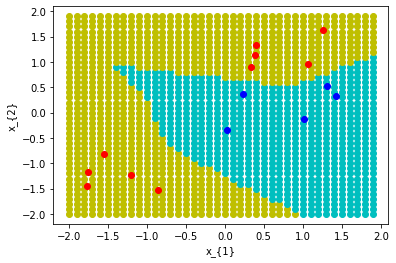

In [ ]:
for x1 in np.arange(-2,2,0.1):
  for x2 in np.arange(-2,2,0.1):
    dist = np.sum((X - np.array([[x1,x2]]))**2,axis=1)
    index = np.argmin(dist)
    if Y[index,:] == 0:
      plt.plot(x1,x2,'co')
    else:
      plt.plot(x1,x2,'yo')

plot_pontos()
plt.show()

(b) Repita o item anterior quando $k = 3$.



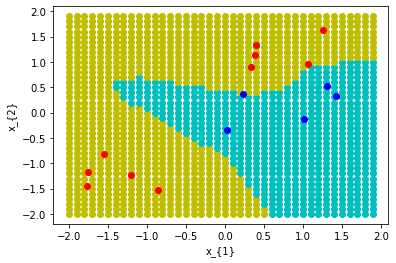

In [ ]:
k = 3;
for x1 in np.arange(-2,2,0.1):
  for x2 in np.arange(-2,2,0.1):
    dist = np.sum((X - np.array([[x1,x2]]))**2,axis=1)
    index = np.argsort(dist)
    if np.mean(Y[index[0:k],:]) < 0.5:
      plt.plot(x1,x2,'co')
    else:
      plt.plot(x1,x2,'yo')

plot_pontos()
plt.show()

6. Medidas de Desempenho:

(a) Os exemplos da tabela não podem ser separados de forma perfeita por uma única reta. Encontre a reta que obtém revocação 1.0 e maximiza a precisão.

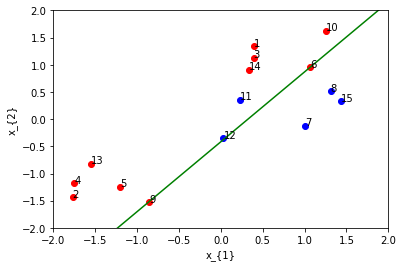

In [ ]:
def plot_pontos_text():
  for index in range(np.size(Y,0)):
    if Y[index,0]==1:
      plt.plot(X[index,0],X[index,1],'ro')
      plt.text(X[index,0],X[index,1],'%d' % (index+1))
    else:
      plt.plot(X[index,0],X[index,1],'bo')
      plt.text(X[index,0],X[index,1],'%d' % (index+1))
  plt.xlabel('x_{1}')
  plt.ylabel('x_{2}')

plot_pontos_text()
ponto1 = 6-1
ponto2 = 9-1
X_plot = X[[ponto1,ponto2],:]
X_plot = 2*X_plot - X_plot[[1,0],:]
plt.plot(X_plot[:,0],X_plot[:,1],'g')
plt.axis([-2, 2, -2, 2])
plt.show()

(b) No item anterior, calcule a precisão obtida.

In [ ]:

10/12

0.8333333333333334

(c) Encontre a reta que obtém precisão 1.0 e maximiza a revocação.

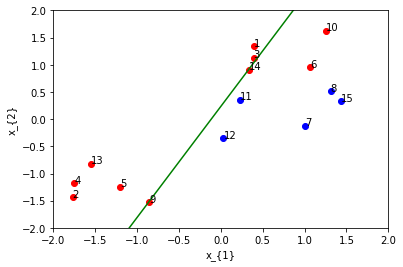

In [ ]:
plot_pontos_text()
ponto1 = 14-1
ponto2 = 9-1
X_plot = X[[ponto1,ponto2],:]
X_plot = 2*X_plot - X_plot[[1,0],:]
plt.plot(X_plot[:,0],X_plot[:,1],'g')
plt.axis([-2, 2, -2, 2])
plt.show()

(d) No item anterior, calcule a revocação obtida.

In [ ]:
8/10

0.8